In dieser Aufgabe behandeln wir die vierteljährliche Bierproduktion in Australien.

---
a) Lesen Sie die Datei AustralianBeer.csv in Python ein, und konvertieren
Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.
**Hinweis:** Um die Daten in Python in eine Zeitreihe zu konvertieren, benützen Sie:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

australian_beer = pd.read_csv("AustralianBeer.csv", sep=";", header=0)
australian_beer.head()

,Quarter,megalitres
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


Text(0, 0.5, 'Megalitres Beer')

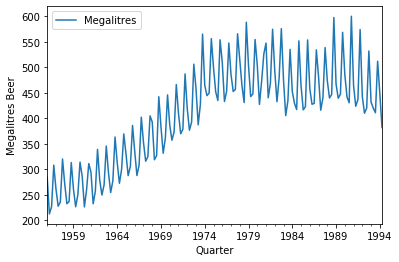

In [2]:
australian_beer["Quarter"] = pd.to_datetime(australian_beer["Quarter"])
australian_beer.set_index("Quarter", inplace=True)
australian_beer.columns=["Megalitres"]
australian_beer.head()
australian_beer.describe()
australian_beer.plot()
plt.ylabel("Megalitres Beer")

---
b) Zeichnen Sie die aggregierten jährlichen Reihen auf und die Boxplots, welche
die beobachteten Daten im Vierteljahr-Zyklus zusammenfassen. Kommentieren
Sie Ihre Beobachtungen der Graphiken.

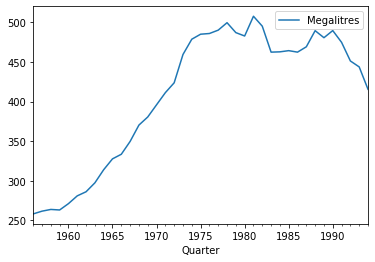

In [3]:
import seaborn

# A means year end (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)
australian_beer.resample("A").mean().plot()

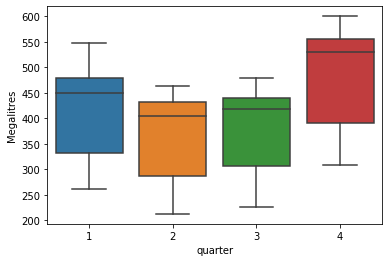

In [4]:
australian_beer['quarter'] = australian_beer.index.quarter
seaborn.boxplot(data=australian_beer, x='quarter', y="Megalitres")

In den waermeren Monaten wird mehr bier konsumiert

---
c) Zerlegen Sie die Zeitreihe in die Komponenten trend, saisonalen Effekt und Residuen
mit Hilfe der Funktion `seasonal_decompose()`. Kommentieren Sie die Resultate. Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?

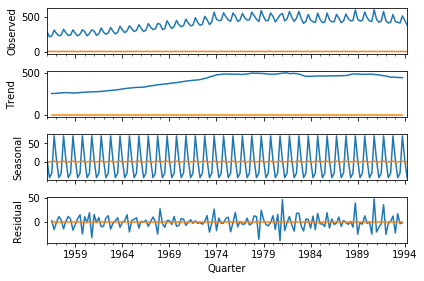

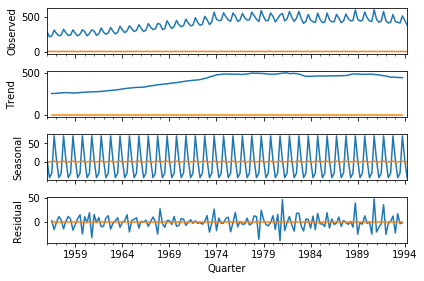

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(australian_beer, model="additive", freq=4).plot()

Die zeitreihe des Restterms (residual) zeigt kaum ein periodisches Muster auf. Auch die Varianz ist stabil konstatn (Seasonal)

---
d) Zerlegen Sie die Zeitreihe nun mit Hilfe des STL-Verfahrens. Wählen Sie eine
passende Fensterbreite, indem Sie für den Parameter `period=...` in `decompose()` 
den Wert variieren. Vergleichen Sie das Resultat mit dem Resultat in Teilaufgabe c).

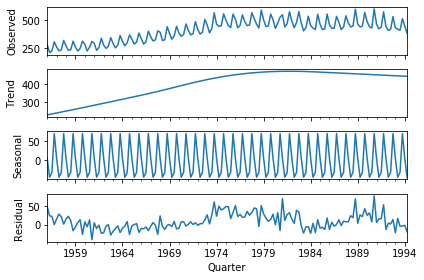

In [18]:
from stldecompose import decompose

australian_beer_stl = decompose(australian_beer["Megalitres"], period=4)
australian_beer_stl.plot();

Wir nehmen als Periode 4, da die saison sich alle vier datensaetze wiederholt (wir haben einen Datensatz pro quartal)